Import all necessity packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing file data and visualisation

In [3]:
data_v1=pd.read_csv('BHARTIARTL.csv')
data_v1.head()


C:\Users\anjul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,sid,scriptname,scriptcode,value,sign,net_count,perc,high,low,...,cfl916_maxd30_fl916,change_mind30ltp_time,cfl916_mind30_fl916,change_maxs30ltp_time,cfl916_maxs30_fl916,change_mins30ltp_time,cfl916_mins30_fl916,level_position_flag,d30s30levelindex,change_flag_time
0,1.610000e+12,1613710000000,BHARTIARTL,10604,28774890.00,1,0,0.3,590.75,590.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
1,1.610000e+12,1613710000000,BHARTIARTL,10604,37438038.00,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
2,1.610000e+12,1613710000000,BHARTIARTL,10604,40689257.95,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
3,1.610000e+12,1613710000000,BHARTIARTL,10604,45336491.75,-1,0,0.2,590.85,590.00,...,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN
4,1.610000e+12,1613710000000,BHARTIARTL,10604,57642206.97,-1,0,0.0,590.85,589.25,...,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN


In [4]:

len(data_v1.index)

21149

In [5]:
#removing row with fl916 data as Field!


data_v1=data_v1[data_v1.fl916 != '#FIELD!']
len(data_v1.index)

21148

In [6]:
data_v1.dtypes

_id                      float64
sid                        int64
scriptname                object
scriptcode                 int64
value                    float64
                          ...   
change_mins30ltp_time     object
cfl916_mins30_fl916      float64
level_position_flag        int64
d30s30levelindex           int64
change_flag_time         float64
Length: 157, dtype: object

In [7]:
#taking only valuable columns for first regression

data_v2= data_v1.filter(['sid','ltp','updatetime','pvr','volume','volumechange','fl916','net_count','m30exp'], axis=1)
data_v2['fl916']=data_v2['fl916'].astype(float)

data_v2.head()

,sid,ltp,updatetime,pvr,volume,volumechange,fl916,net_count,m30exp
0,1613710000000,590.75,2021-02-19T09:15:07.457Z,12.6,48771,48771,0.0,0,0.0
1,1613710000000,590.70,2021-02-19T09:15:10.445Z,9.4,63450,13409,0.0,0,0.0
2,1613710000000,590.70,2021-02-19T09:15:11.400Z,10.2,68959,5509,0.0,0,0.0
3,1613710000000,590.00,2021-02-19T09:15:12.271Z,7.2,76835,-7876,0.0,0,0.0
4,1613710000000,589.25,2021-02-19T09:15:13.083Z,9.2,97697,-20862,0.0,0,0.0


In [8]:
data_v2.dtypes


sid               int64
ltp             float64
updatetime       object
pvr             float64
volume            int64
volumechange      int64
fl916           float64
net_count         int64
m30exp          float64
dtype: object

In [9]:
#data_v2['updatetime']=data_v2['updatetime'].astype(str)

In [10]:
##corelation in dataset v2

op_co_v2= data_v2.corr()
op_co_v2

,sid,ltp,pvr,volume,volumechange,fl916,net_count,m30exp
sid,1.000000,-0.823135,-0.495758,0.907043,-0.002054,-0.902132,NaN,0.000235
ltp,-0.823135,1.000000,0.410799,-0.908839,0.012239,0.950971,NaN,0.358273
pvr,-0.495758,0.410799,1.000000,-0.644588,0.007873,0.579640,NaN,0.289884
volume,0.907043,-0.908839,-0.644588,1.000000,-0.003824,-0.987704,NaN,-0.180910
volumechange,-0.002054,0.012239,0.007873,-0.003824,1.000000,0.006004,NaN,0.020171
fl916,-0.902132,0.950971,0.579640,-0.987704,0.006004,1.000000,NaN,0.247510
net_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m30exp,0.000235,0.358273,0.289884,-0.180910,0.020171,0.247510,NaN,1.000000


C:\Users\anjul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\anjul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\anjul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D099FA3D0>,
      dtype=object)

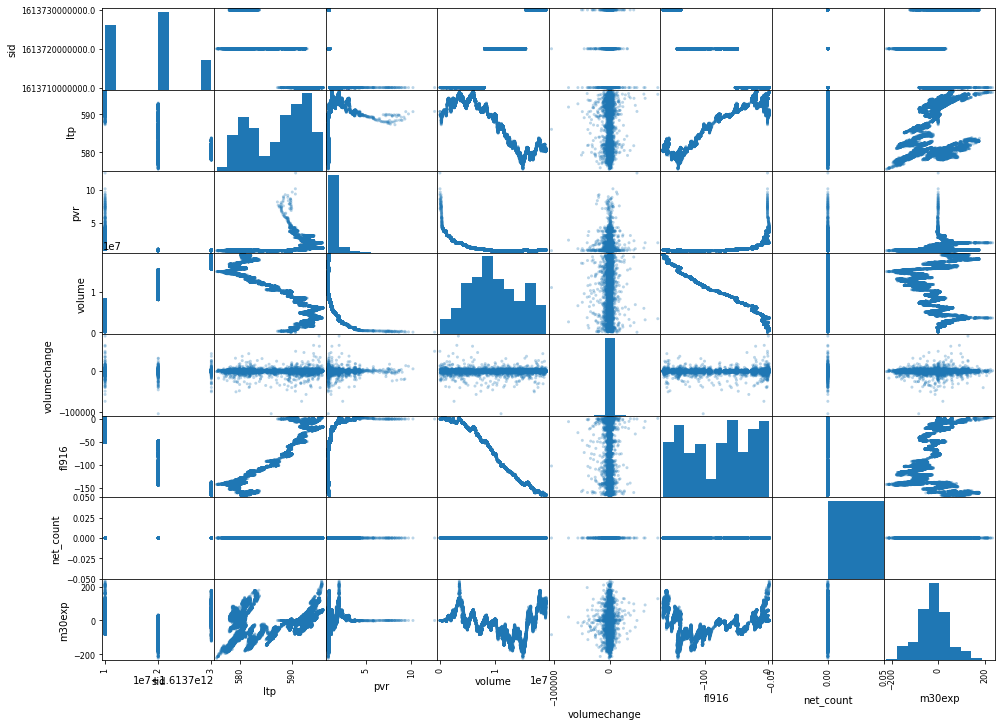

In [11]:
##plot the graph 

#import required packages 
from pandas.plotting import scatter_matrix

scatter_matrix(data_v2,figsize=(16,12),alpha=0.3)

<h1> Evaluation from above scatter plot :</h1>
    
1. ltp is directly varying with pvr for early stage and later fluctuations.
2. With inctrreasing pvr - volumne data is exponentially decreasing
3. Mostly volumechange data is constant for all other parameters, as it is forming a perpendicular linearity wrt volumne, pvr and ltp
    

<H2> Evaluating all columns wrt ltp

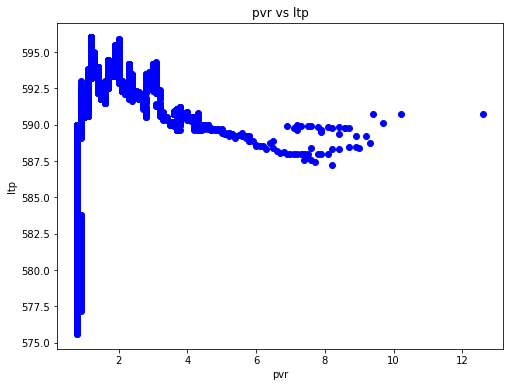

In [12]:
#pvr vs ltp

plt.figure(figsize=(8,6))
plt.scatter(data_v2.pvr, data_v2.ltp, color='blue')
plt.xlabel('pvr')
plt.ylabel('ltp')
plt.title('pvr vs ltp')
plt.show()

In [14]:
#Updatetime wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.updatetime, data_v2.ltp, color='blue')
plt.xlabel('updatetime')
plt.ylabel('ltp')
plt.title('updatetime vs ltp')
plt.show()


KeyboardInterrupt: 

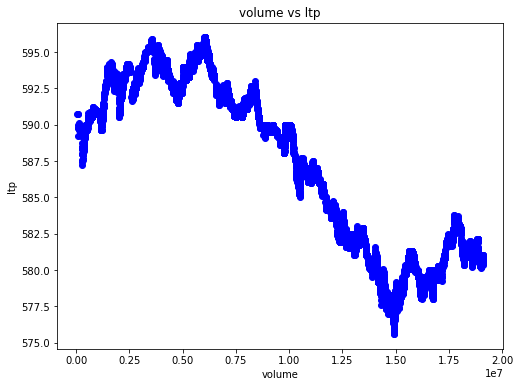

In [15]:
#volume wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.volume, data_v2.ltp, color='blue')
plt.xlabel('volume')
plt.ylabel('ltp')
plt.title('volume vs ltp')
plt.show()

In [16]:
#fl916 wrt ltp
#plt.figure(figsize=(8,6))
#plt.scatter(data_v2.fl916, data_v2.ltp, color='blue')
#plt.xlabel('fl916')
#plt.ylabel('ltp')
#plt.title('fl916 vs ltp')
#plt.show()

z=1
#error --- fl916 - has negative value, due to which matplotlib is not plotting .. Needs Investigation

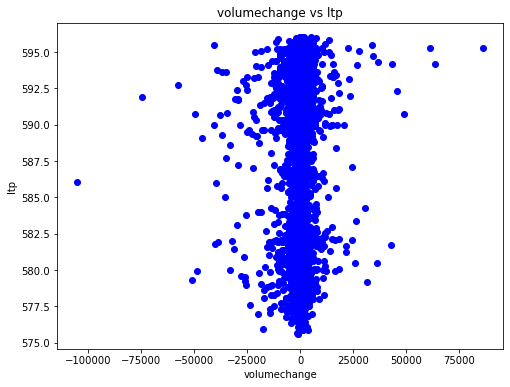

In [17]:
#volume wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.volumechange, data_v2.ltp, color='blue')
plt.xlabel('volumechange')
plt.ylabel('ltp')
plt.title('volumechange vs ltp')
plt.show()

Train and test data 

In [18]:
X = data_v2.filter(['pvr','volume','fl916','m30exp','net_count'],axis=1)
y = data_v2['ltp']
X.head()

,pvr,volume,fl916,m30exp,net_count
0,12.6,48771,0.0,0.0,0
1,9.4,63450,0.0,0.0,0
2,10.2,68959,0.0,0.0,0
3,7.2,76835,0.0,0.0,0
4,9.2,97697,0.0,0.0,0


In [19]:
y.head()

0    590.75
1    590.70
2    590.70
3    590.00
4    589.25
Name: ltp, dtype: float64

In [20]:
X.dtypes

X['fl916'].astype('float')


0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
21144   -165.62
21145   -165.58
21146   -165.64
21147   -165.60
21148   -165.58
Name: fl916, Length: 21148, dtype: float64

In [21]:
#split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

# train and test data should be 80:20 ratio

16918
4230
16918
4230


<h1> Linear Regression models 

<H3> Model 1 - no change in fl916

In [22]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()  # create object for the class
model_1=lm.fit(X_train, y_train)  # perform linear regression
Y_pred = lm.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[584.674175   579.8235189  593.5466058  ... 594.54296069 588.53197115
 593.52348593]


In [23]:
Y_pred

array([584.674175  , 579.8235189 , 593.5466058 , ..., 594.54296069,
       588.53197115, 593.52348593])

In [24]:
#calculating accuracy of the model :


from sklearn.metrics import r2_score
r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.960487477703436


Our Linear Regression Model is 96.04 % accurate

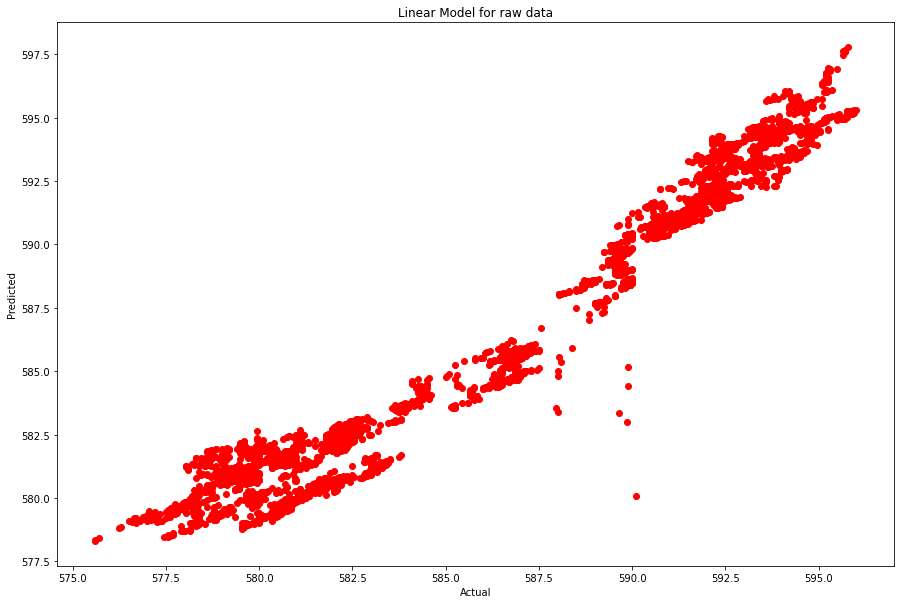

In [25]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for raw data')
plt.show()

<h5> Example prediction

In [26]:
lm.predict([[9.4,63450,0,0,0]])

array([580.62014025])

In [27]:
#linear regression without x, y split:

lm = LinearRegression()  # create object for the class
model_all=lm.fit(X, y)  # perform linear regression
pred_all = lm.predict(X)


In [28]:
len(pred_all)

21148

In [29]:
len(y)

21148

In [30]:
ts_data=pd.DataFrame({'pred_all': pred_all, 'ltp': y,'updatetime':data_v2['updatetime']})
ts_data

,pred_all,ltp,updatetime
0,574.758762,590.75,2021-02-19T09:15:07.457Z
1,580.565130,590.70,2021-02-19T09:15:10.445Z
2,579.115440,590.70,2021-02-19T09:15:11.400Z
3,584.557691,590.00,2021-02-19T09:15:12.271Z
4,580.934936,589.25,2021-02-19T09:15:13.083Z
...,...,...,...
21144,580.443990,580.55,2021-02-19T15:29:55.033Z
21145,580.626980,580.95,2021-02-19T15:29:56.016Z
21146,580.353818,580.50,2021-02-19T15:29:57.006Z
21147,580.536962,580.95,2021-02-19T15:29:58.174Z


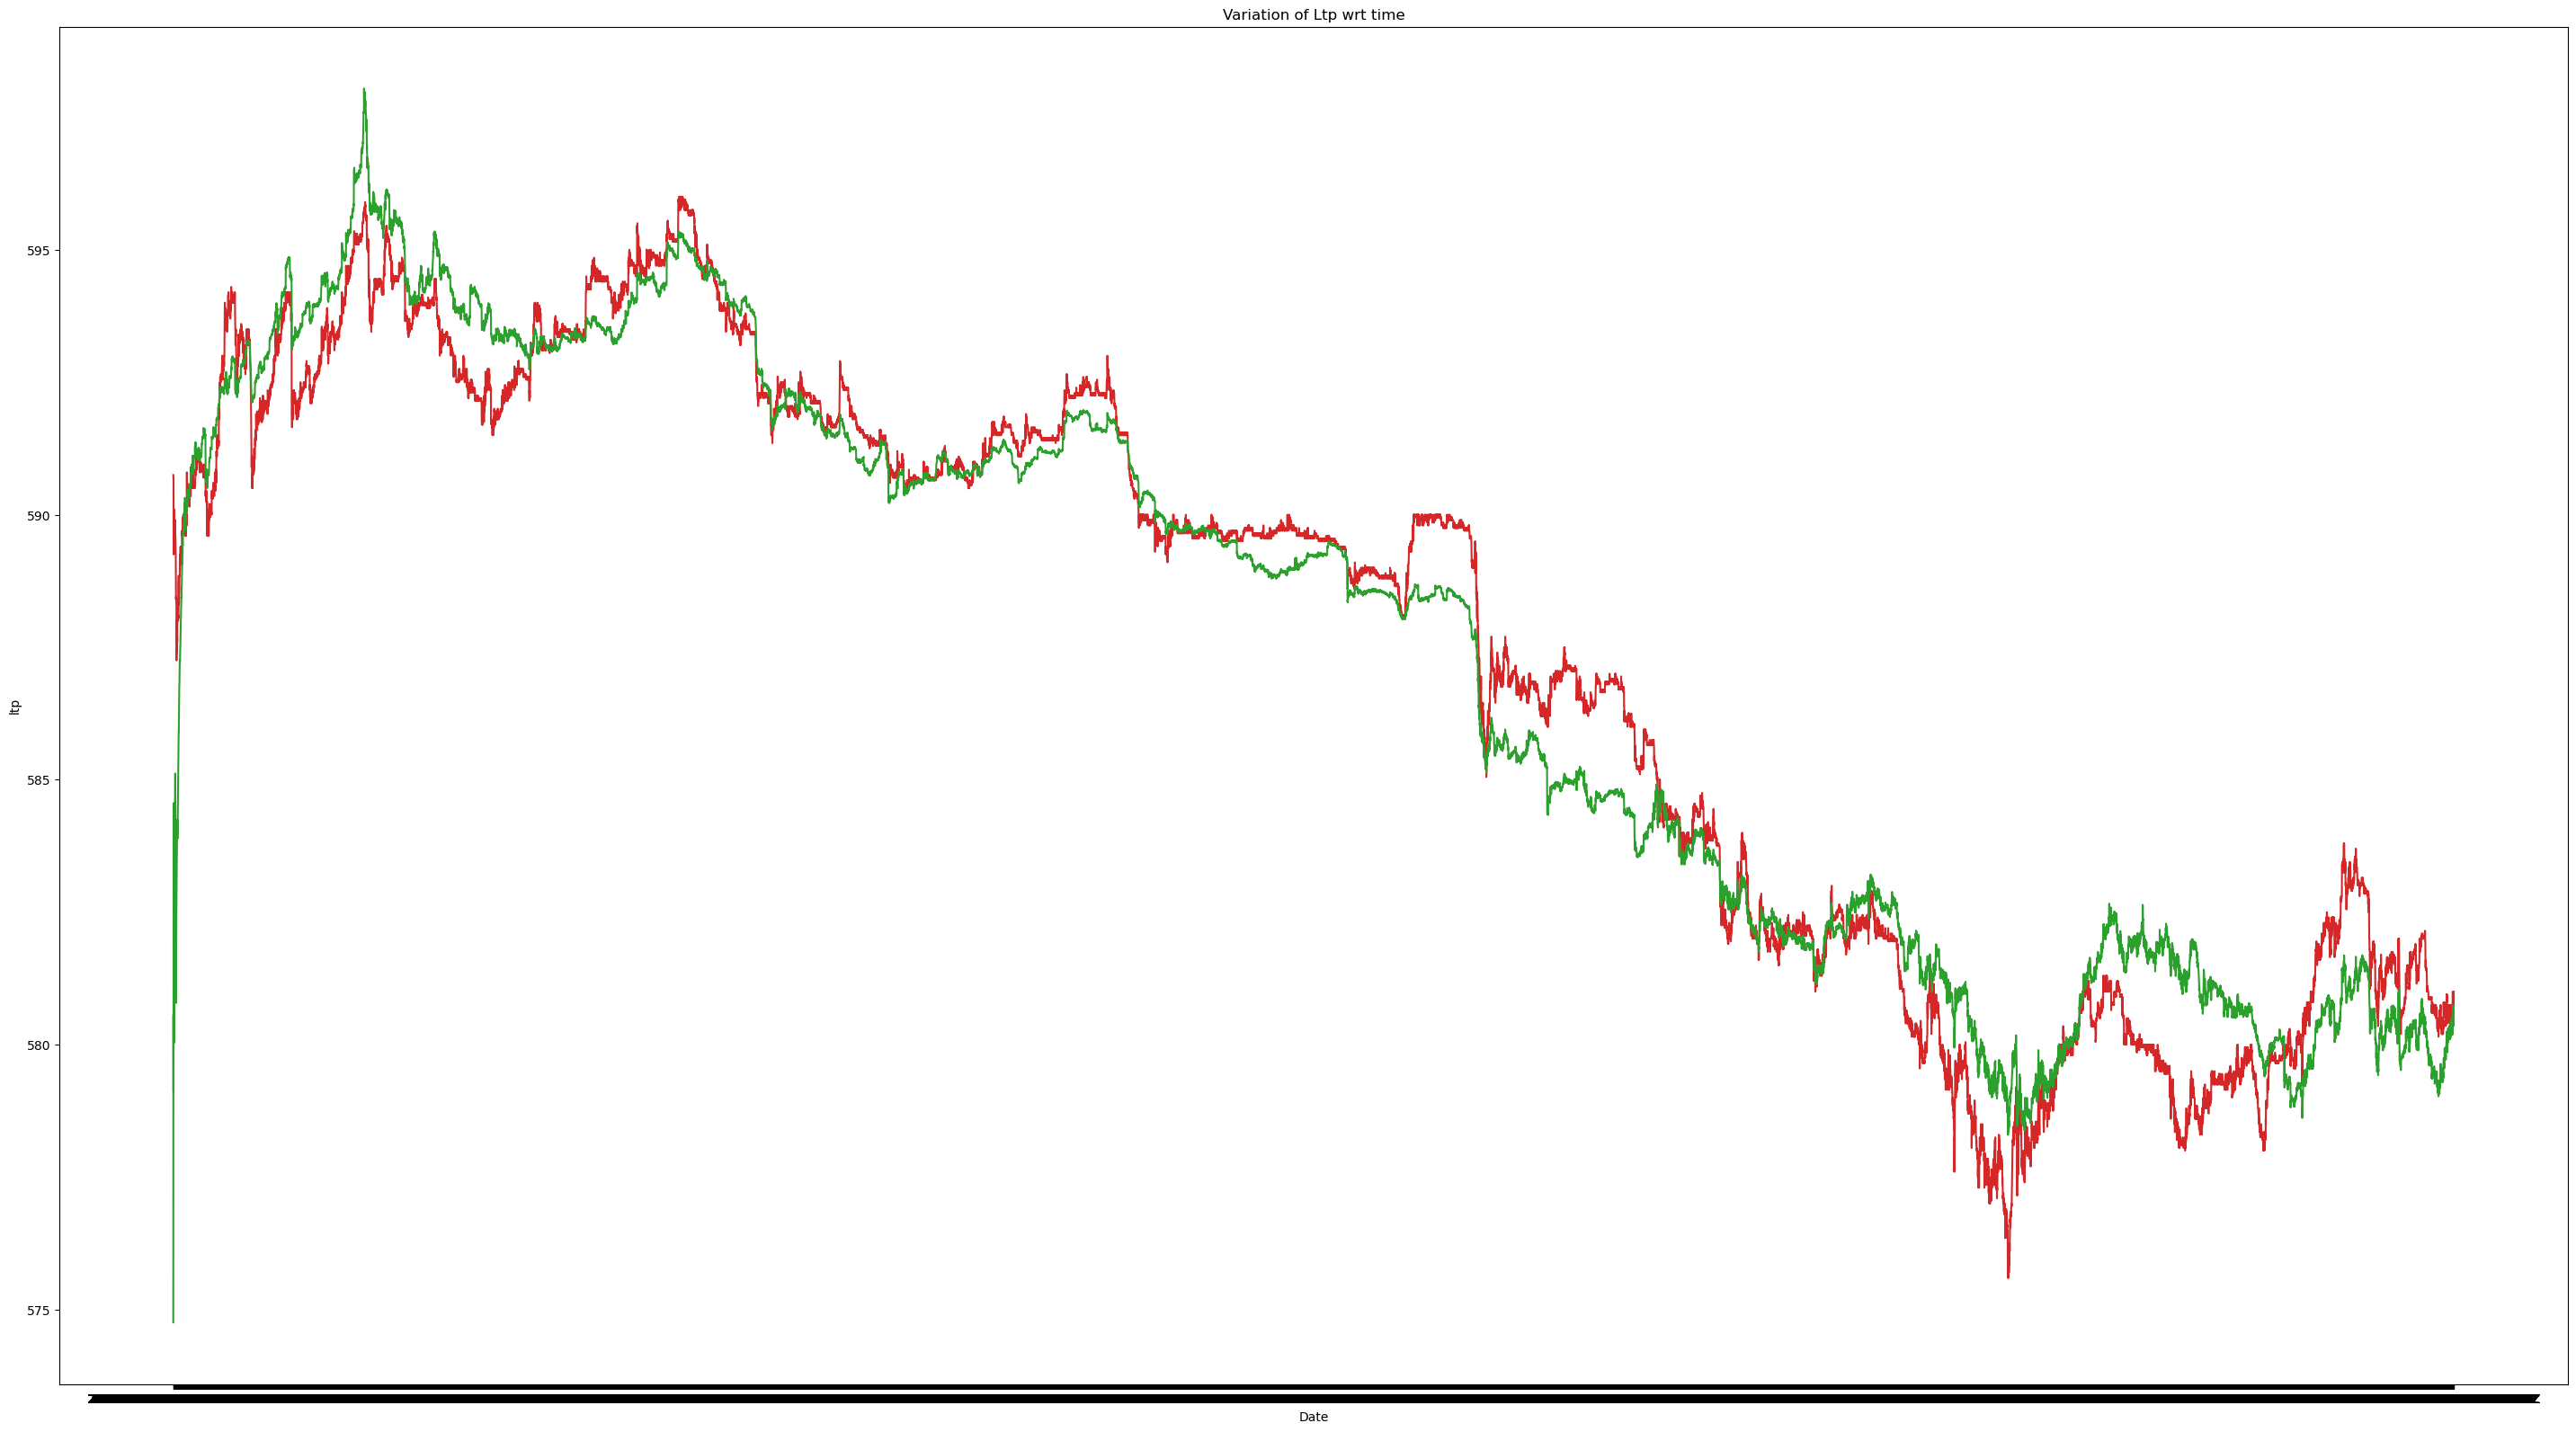

In [31]:
# Draw Plot
def plot_df(ts_data, x,y1, y2, title="", xlabel='Date', ylabel='ltp', dpi=100):
    plt.figure(figsize=(36,20), dpi=dpi)
    plt.plot(x, y1, color='tab:red')
    plt.plot(x,y2,color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
    
plot_df(ts_data, x=data_v2.updatetime, y1=ts_data.ltp, y2=ts_data.pred_all,title='Variation of Ltp wrt time')    

<H3> Model 2 - getting difference in amount fl916 per second

In [39]:
data_v3= data_v2
data_v3

,sid,ltp,updatetime,pvr,volume,volumechange,fl916,net_count,m30exp
0,1613710000000,590.75,2021-02-19T09:15:07.457Z,12.6,48771,48771,0.00,0,0.00
1,1613710000000,590.70,2021-02-19T09:15:10.445Z,9.4,63450,13409,0.00,0,0.00
2,1613710000000,590.70,2021-02-19T09:15:11.400Z,10.2,68959,5509,0.00,0,0.00
3,1613710000000,590.00,2021-02-19T09:15:12.271Z,7.2,76835,-7876,0.00,0,0.00
4,1613710000000,589.25,2021-02-19T09:15:13.083Z,9.2,97697,-20862,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...
21144,1613730000000,580.55,2021-02-19T15:29:55.033Z,0.9,19096137,-750,-165.62,0,113.20
21145,1613730000000,580.95,2021-02-19T15:29:56.016Z,0.9,19096819,682,-165.58,0,127.08
21146,1613730000000,580.50,2021-02-19T15:29:57.006Z,0.9,19097855,-1036,-165.64,0,106.33
21147,1613730000000,580.95,2021-02-19T15:29:58.174Z,0.9,19098662,807,-165.60,0,120.22


In [40]:
#data set 4 where we will get the difference in column fl916 as it is commulative sum with time

data_v3= data_v2
data_v3['fl916_sec']= 0
data_v3['fl916_sec']=data_v3['fl916_sec'].astype(float)
data_v3['fl916']=data_v3['fl916'].astype(float)

data_v3



,sid,ltp,updatetime,pvr,volume,volumechange,fl916,net_count,m30exp,fl916_sec
0,1613710000000,590.75,2021-02-19T09:15:07.457Z,12.6,48771,48771,0.00,0,0.00,0.0
1,1613710000000,590.70,2021-02-19T09:15:10.445Z,9.4,63450,13409,0.00,0,0.00,0.0
2,1613710000000,590.70,2021-02-19T09:15:11.400Z,10.2,68959,5509,0.00,0,0.00,0.0
3,1613710000000,590.00,2021-02-19T09:15:12.271Z,7.2,76835,-7876,0.00,0,0.00,0.0
4,1613710000000,589.25,2021-02-19T09:15:13.083Z,9.2,97697,-20862,0.00,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
21144,1613730000000,580.55,2021-02-19T15:29:55.033Z,0.9,19096137,-750,-165.62,0,113.20,0.0
21145,1613730000000,580.95,2021-02-19T15:29:56.016Z,0.9,19096819,682,-165.58,0,127.08,0.0
21146,1613730000000,580.50,2021-02-19T15:29:57.006Z,0.9,19097855,-1036,-165.64,0,106.33,0.0
21147,1613730000000,580.95,2021-02-19T15:29:58.174Z,0.9,19098662,807,-165.60,0,120.22,0.0


In [41]:
def cfl916_sec_dif() :
    cnt=0
    for index, row in data_v3.iterrows():
        #print(row['sid'], row['ltp']
        if (index==0):
            data_v3.iloc[cnt,9]= data_v3.iloc[cnt,6]
        else: 
            data_v3.iloc[cnt,9]= data_v3.iloc[cnt,6]-prev_fl916
        prev_fl916=data_v3.iloc[cnt,6]
        prev_fl916.astype(float)
        cnt+=1
        
# Driver Code
if __name__=='__main__':
    cfl916_sec_dif()
    #data_v3.drop(['8'],axis=1)


In [42]:
data_v3.tail()

,sid,ltp,updatetime,pvr,volume,volumechange,fl916,net_count,m30exp,fl916_sec
21144,1613730000000,580.55,2021-02-19T15:29:55.033Z,0.9,19096137,-750,-165.62,0,113.20,-0.04
21145,1613730000000,580.95,2021-02-19T15:29:56.016Z,0.9,19096819,682,-165.58,0,127.08,0.04
21146,1613730000000,580.50,2021-02-19T15:29:57.006Z,0.9,19097855,-1036,-165.64,0,106.33,-0.06
21147,1613730000000,580.95,2021-02-19T15:29:58.174Z,0.9,19098662,807,-165.60,0,120.22,0.04
21148,1613730000000,581.00,2021-02-19T15:29:59.026Z,0.9,19098893,231,-165.58,0,127.16,0.02


<H4> Plotting co-relation and Linear regression for this dataset

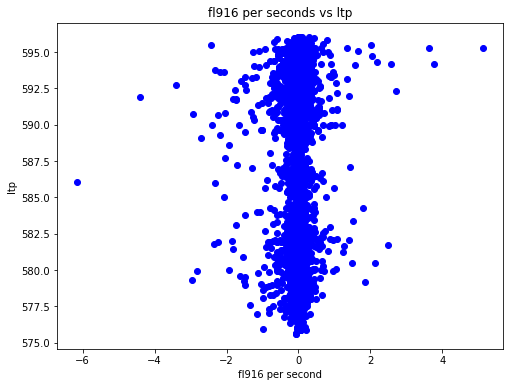

In [44]:
#fl916 wrt ltp per seconds
plt.figure(figsize=(8,6))
plt.scatter(data_v3.fl916_sec, data_v3.ltp, color='blue')
plt.xlabel('fl916 per second')
plt.ylabel('ltp')
plt.title('fl916 per seconds vs ltp')
plt.show()

In [46]:
X = data_v3.filter(['pvr','volume','fl916_sec','m30exp','net_count'])
y = data_v3['ltp']
X.tail()

,pvr,volume,fl916_sec,m30exp,net_count
21144,0.9,19096137,-0.04,113.20,0
21145,0.9,19096819,0.04,127.08,0
21146,0.9,19097855,-0.06,106.33,0
21147,0.9,19098662,0.04,120.22,0
21148,0.9,19098893,0.02,127.16,0


In [47]:
y.tail()

21144    580.55
21145    580.95
21146    580.50
21147    580.95
21148    581.00
Name: ltp, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

16918
4230
16918
4230


In [49]:

lm3 = LinearRegression()  # create object for the class
model_3=lm3.fit(X_train, y_train)  # perform linear regression
Y_pred = lm3.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[586.10185011 578.89060035 594.53641785 ... 594.32096822 589.28140547
 594.96722455]


In [50]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.9444201449807287


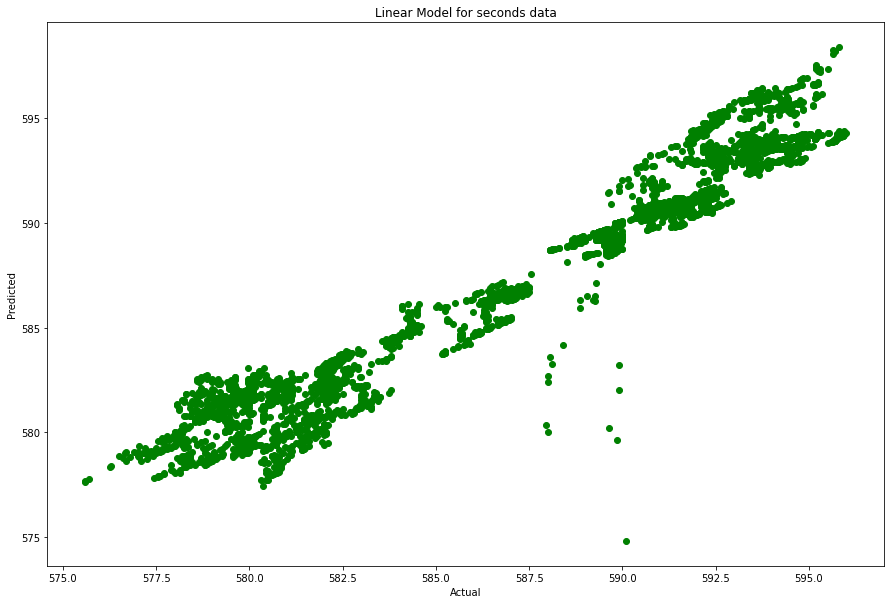

In [51]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for seconds data')
plt.show()

<H3> Model 4 - getting difference in amount fl916 per minute

In [54]:
#data set 4 where we will get the difference in column fl916 for every minute


data_v4= pd.DataFrame(columns=['updatetime','pvr','volume','fl916','fl916_min','ltp','m30exp','net_count'])
data_v4['pvr']=data_v4['pvr'].astype(float)
data_v4['volume']=data_v4['volume'].astype(float)
data_v4['fl916']=data_v4['fl916'].astype(float)
data_v4['fl916_min']=data_v4['fl916_min'].astype(float)
data_v4['ltp']=data_v4['ltp'].astype(float)
data_v4['m30exp']=data_v4['m30exp'].astype(float)
data_v4['net_count']=data_v4['net_count'].astype(float)


def cfl916_min_dif() :
    cnt=0
    mint=1
    row_data =[]
    for index, row in data_v2.iterrows():
        #print(index)
        row_data.append(data_v2.iloc[cnt,2]) #updatetime
        row_data.append(data_v2.iloc[cnt,3]) #pvr
        row_data.append(data_v2.iloc[cnt,4]) #volume
        row_data.append(data_v2.iloc[cnt,6]) #fl916
        row_data.append(0) #fl916_min
        row_data.append(data_v2.iloc[cnt,1]) #ltp
        row_data.append(data_v2.iloc[cnt,8])#m30exp
        row_data.append(data_v2.iloc[cnt,7]) #net_count
        #print(row_data)
        if (index==0):
            data_v4.loc[cnt] = row_data
            prev_fl916=data_v4.iloc[cnt,3]
            #prev_fl916.astype(float)
        else: 
            if(cnt%60==0):
                data_v4.loc[mint] = row_data
                data_v4.iloc[mint,4]= data_v4.iloc[mint,3]-prev_fl916
                prev_fl916=data_v4.iloc[mint,3]
                mint+=1
        cnt+=1
        row_data.clear()
# Driver Code
if __name__=='__main__':
    cfl916_min_dif()
    




In [56]:
data_v4.head()

,updatetime,pvr,volume,fl916,fl916_min,ltp,m30exp,net_count
0,2021-02-19T09:15:07.457Z,12.6,48771.0,0.00,0.00,590.75,0.00,0.0
1,2021-02-19T09:16:05.012Z,5.8,363540.0,0.63,0.63,588.85,-1.65,0.0
2,2021-02-19T09:17:05.709Z,4.2,512880.0,0.46,-0.17,589.85,-1.63,0.0
3,2021-02-19T09:18:05.808Z,3.8,687881.0,2.08,1.62,590.80,0.14,0.0
4,2021-02-19T09:19:05.903Z,3.7,874207.0,1.09,-0.99,591.00,0.94,0.0


In [57]:
data_v4.dtypes

updatetime     object
pvr           float64
volume        float64
fl916         float64
fl916_min     float64
ltp           float64
m30exp        float64
net_count     float64
dtype: object

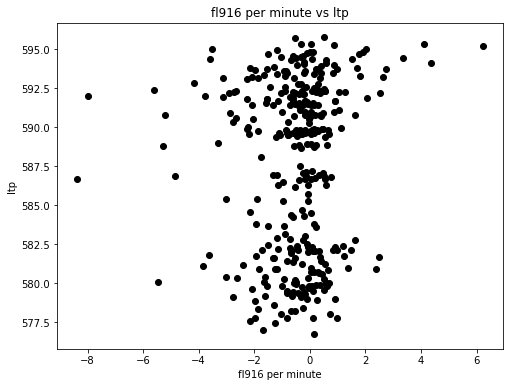

In [58]:
#fl916 wrt ltp per minute abd ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v4.fl916_min, data_v4.ltp, color='black')
plt.xlabel('fl916 per minute')
plt.ylabel('ltp')
plt.title('fl916 per minute vs ltp')
plt.show()

In [60]:
X = data_v4.filter(['pvr','volume','fl916_min','net_count','m30exp'])
y = data_v4['ltp']
X.tail()

,pvr,volume,fl916_min,net_count,m30exp
348,0.9,18848827.0,1.49,0.0,108.06
349,0.9,18907751.0,-1.25,0.0,52.29
350,0.9,18973645.0,-0.93,0.0,20.75
351,0.9,19029721.0,0.14,0.0,62.23
352,0.9,19078716.0,0.29,0.0,117.88


In [61]:
y.tail()

348    582.15
349    580.90
350    580.25
351    580.70
352    580.75
Name: ltp, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

282
71
282
71


In [63]:
#linear regression model 4
lm4 = LinearRegression()  # create object for the class
model_4=lm4.fit(X_train, y_train)  # perform linear regression
Y_pred = lm4.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[594.47805413 590.86544412 582.19697404 586.10375927 591.88847973
 583.75760937 590.01923945 592.82406091 593.49552131 580.07434772
 596.47714546 579.27148496 584.83140783 581.44811138 590.62987994
 586.65268429 590.52868311 580.13652404 593.31249481 580.42381349
 588.61241089 583.12201795 592.90632575 586.65156118 585.6299203
 584.61114495 593.60751768 593.53530511 595.59790658 590.58072858
 582.18839351 590.43243697 592.98188514 592.17504977 592.54239844
 588.5003712  589.16942377 591.1043485  583.07021488 589.67050464
 595.46937984 586.17243023 588.5023391  580.65474196 579.95639878
 580.9524722  589.76304449 593.00298013 593.65584858 588.87291278
 581.84300316 582.58808246 580.09319853 582.09905518 595.00326405
 593.4456422  579.96082586 588.74592812 583.37159575 585.23387967
 592.89063069 590.09315454 590.62856201 592.95904584 590.12712356
 582.07091986 581.64511339 588.64903455 586.11906625 579.94633695
 593.03286577]


In [64]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.9248064998203949


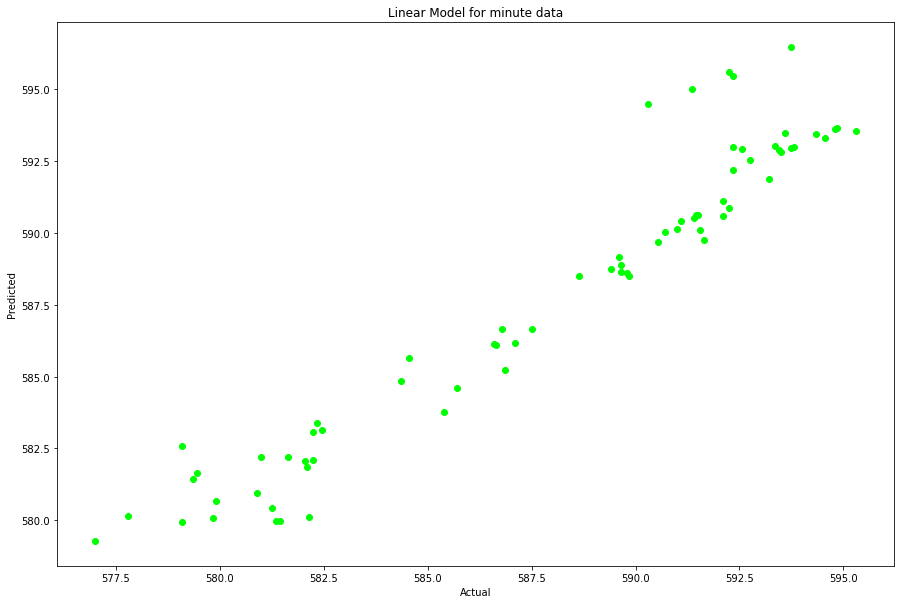

In [65]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='lime')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for minute data')
plt.show()

<H3> Model 5 - getting difference in amount fl916 per 5 minutes

In [66]:
#data set 5 where we will get the difference in column fl916 for every 5 minutes


data_v5= pd.DataFrame(columns=['updatetime','pvr','volume','fl916','fl916_5min','ltp','m30_exp','net_count'])
data_v5['pvr']=data_v5['pvr'].astype(float)
data_v5['volume']=data_v5['volume'].astype(float)
data_v5['fl916']=data_v5['fl916'].astype(float)
data_v5['fl916_5min']=data_v5['fl916_5min'].astype(float)
data_v5['ltp']=data_v5['ltp'].astype(float)


def cfl916_5min_dif() :
    cnt=0
    mint=1
    row_data =[]
    for index, row in data_v2.iterrows():
        #print(index)
        row_data.append(data_v2.iloc[cnt,2]) #updatetime
        row_data.append(data_v2.iloc[cnt,3]) #pvr
        row_data.append(data_v2.iloc[cnt,4]) #volume
        row_data.append(data_v2.iloc[cnt,6]) #fl916
        row_data.append(0) #fl916_min
        row_data.append(data_v2.iloc[cnt,1])#ltp
        row_data.append(data_v2.iloc[cnt,8])#m30exp
        row_data.append(data_v2.iloc[cnt,7]) #net_count
        #print(row_data)
        if (index==0):
            data_v5.loc[cnt] = row_data
            prev_fl916=data_v5.iloc[cnt,3]
            #prev_fl916.astype(float)
        else: 
            if(cnt%300==0):
                data_v5.loc[mint] = row_data
                data_v5.iloc[mint,4]= data_v5.iloc[mint,3]-prev_fl916
                prev_fl916=data_v5.iloc[mint,3]
                mint+=1
        cnt+=1
        row_data.clear()
# Driver Code
if __name__=='__main__':
    cfl916_5min_dif()
    




In [67]:
data_v5.head()

,updatetime,pvr,volume,fl916,fl916_5min,ltp,m30_exp,net_count
0,2021-02-19T09:15:07.457Z,12.6,48771.0,0.00,0.00,590.75,0.00,0
1,2021-02-19T09:20:06.176Z,3.7,1104174.0,-1.67,-1.67,590.35,-1.91,0
2,2021-02-19T09:25:07.246Z,3.0,1765294.0,-3.75,-2.08,592.85,20.42,0
3,2021-02-19T09:30:19.937Z,2.4,2163776.0,-5.26,-1.51,592.25,21.99,0
4,2021-02-19T09:35:31.226Z,2.2,2677558.0,-6.27,-1.01,592.35,31.42,0


In [68]:
data_v5.tail()

,updatetime,pvr,volume,fl916,fl916_5min,ltp,m30_exp,net_count
66,2021-02-19T15:07:01.642Z,0.8,17253528.0,-159.88,-7.14,580.70,12.83,0
67,2021-02-19T15:12:11.939Z,0.9,17693987.0,-158.92,0.96,582.75,94.75,0
68,2021-02-19T15:17:15.591Z,0.9,18136625.0,-163.82,-4.90,581.75,114.62,0
69,2021-02-19T15:22:26.264Z,0.9,18627602.0,-163.89,-0.07,580.90,63.24,0
70,2021-02-19T15:27:31.754Z,0.9,18973645.0,-166.50,-2.61,580.25,20.75,0


In [69]:
data_v5.dtypes

updatetime     object
pvr           float64
volume        float64
fl916         float64
fl916_5min    float64
ltp           float64
m30_exp       float64
net_count      object
dtype: object

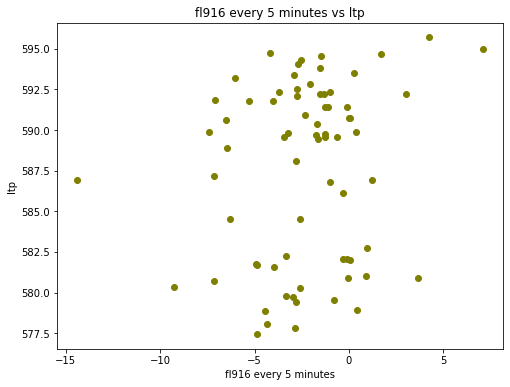

In [70]:
#fl916 wrt ltp per 5 minutes
plt.figure(figsize=(8,6))
plt.scatter(data_v5.fl916_5min, data_v5.ltp, color='olive')
plt.xlabel('fl916 every 5 minutes')
plt.ylabel('ltp')
plt.title('fl916 every 5 minutes vs ltp')
plt.show()

In [71]:
X = data_v5.filter(['pvr','volume','fl916_5min'])
y = data_v5['ltp']
X.tail()

,pvr,volume,fl916_5min
66,0.8,17253528.0,-7.14
67,0.9,17693987.0,0.96
68,0.9,18136625.0,-4.90
69,0.9,18627602.0,-0.07
70,0.9,18973645.0,-2.61


In [72]:
y.tail()

66    580.70
67    582.75
68    581.75
69    580.90
70    580.25
Name: ltp, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

56
15
56
15


In [74]:
#linear regression model 5
lm5 = LinearRegression()  # create object for the class
model_5=lm5.fit(X_train, y_train)  # perform linear regression
Y_pred = lm5.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[590.06047929 590.18480575 584.9383619  590.8420703  588.40824482
 583.809083   593.38135384 582.09970156 588.7321054  577.32716465
 582.40712283 590.47628636 588.80446805 587.00392058 588.50818351]


In [75]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.8555924482929707


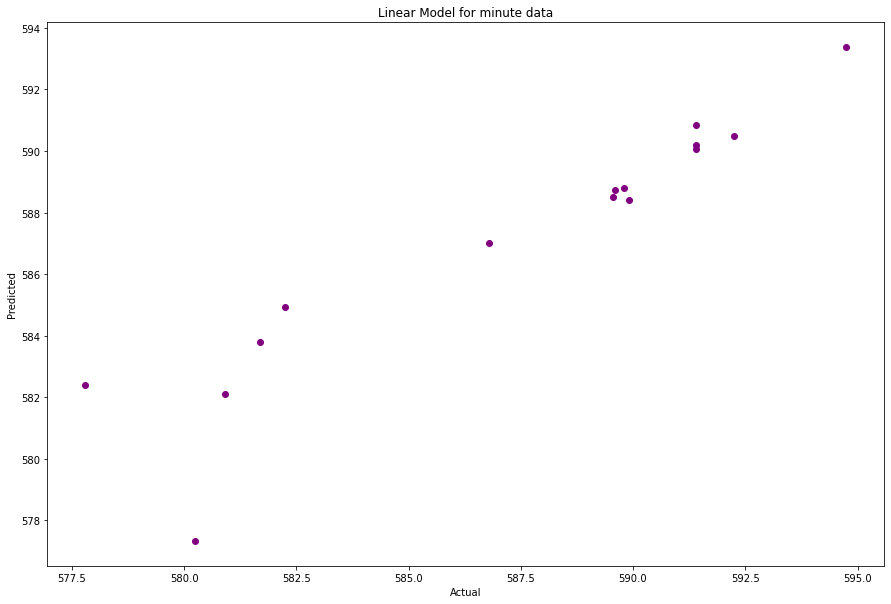

In [76]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for minute data')
plt.show()